TA MED LOW-NTF-GIDDENS!!!

# Plot temperature response over time

This notebook does the same as [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) except that it varies the ECS parameter and outputs a table of changes in temperature with respect to some reference year (defined below).

In [1]:
import pandas as pd

In [2]:
from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


**Output table found in:**

### General about computing $\Delta T$:

We compute the change in GSAT temperature ($\Delta T$) from the effective radiative forcing (ERF) estimated from [Smith 2020](https://zenodo.org/record/3973015), by integrating with the impulse response function (IRF(t-t'))
#todo: check for ref for IRF
(Geoffroy at al 2013).

For any forcing agent $x$, with estimated ERF$_x$, the change in temperature $\Delta T$ is calculated as:


\begin{align*}
\Delta T_x (t) &= \int_0^t ERF_x(t') IRF(t-t') dt' \\
\end{align*}

#### The Impulse response function (IRF):
In these calculations we use:
\begin{align*}
IRF(t) = \frac{q_1}{d_1} \exp\Big(\frac{-t}{d_1}\Big) + \frac{q_2}{d_2} \exp\Big(\frac{-t}{d_2}\Big)
\end{align*}

Where the constants, $q_i$ and $d_i$ are from XXXXXX????

## Input data:
See [README.md](../../README.md)

# Code + figures

In [3]:
#fn_IRF_constants = INPUT_DATA_DIR / 'irf_from_2xCO2_2020_12_02_050025-1.csv'
fn_IRF_constants = INPUT_DATA_DIR / 'irf_from_2xCO2_2021_02_02_025721.csv'
fn_IRF_constants = INPUT_DATA_DIR / 'irf_from_2xCO2_2021_02_03_045947.csv'
irf_consts = pd.read_csv(fn_IRF_constants).set_index('id')

ld1 = 'd1 (yr)'
ld2 = 'd2 (yr)'
lq1 = 'q1 (K / (W / m^2))'
lq2 = 'q2 (K / (W / m^2))'
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'
irf_consts  # [d1]

,C (W yr / m^2 / K),C_d (W yr / m^2 / K),alpha (W / m^2 / K),eta (dimensionless),kappa (W / m^2 / K),d1 (yr),d2 (yr),q1 (K / (W / m^2)),q2 (K / (W / m^2)),efficacy (dimensionless),ecs (K),tcr (K),rf2xCO2 (W / m^2)
id,,,,,,,,,,,,,
median,6.616560,158.984572,1.346155,0.740897,0.943549,3.213763,257.699832,0.482468,0.260389,0.740897,2.827021,1.874972,3.805608
5th percentile,15.299962,159.371573,1.756006,0.815784,1.024930,5.829239,232.417682,0.376148,0.193326,0.815784,1.910239,1.245226,3.354391
95th percentile,11.471438,159.568805,0.944838,0.931443,0.700394,7.089158,390.185772,0.609834,0.448548,0.931443,4.559456,2.524502,4.307950
ensemble member 3,6.628688,158.986070,1.474927,0.788979,0.986716,2.922949,247.743863,0.438124,0.239876,0.788979,2.503816,1.664557,3.692945
ensemble member 8,6.625588,158.985708,1.478120,0.763385,0.909555,3.032694,258.353975,0.455125,0.221409,0.763385,2.460536,1.683434,3.636968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensemble member 587,15.394590,159.866091,1.707522,0.974868,0.862878,5.974433,279.583665,0.383773,0.201871,0.974868,2.317977,1.481504,3.957998
ensemble member 594,12.700636,159.750879,0.752217,0.856284,0.749440,8.931436,402.964990,0.689034,0.640369,0.856284,4.638803,2.280971,3.489388
ensemble member 579,17.917692,159.113809,1.610441,0.869394,0.920898,7.323795,262.480668,0.402656,0.218292,0.869394,2.344956,1.462282,3.776414


In [4]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'

PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables' / 'table_sens_dT_cs.csv'
PATH_DT_OUTPUT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'

**Output table found in:**

In [5]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP.nc


## Imports:

In [6]:
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [7]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'
percentile = 'percentile'

## Set values:

ECS parameters:

In [8]:
IRFpercentiles = [perc5, median, perc95]
# {'ECS = 2K':0.526, 'ECS = 3.4K':0.884, 'ECS = 5K': 1.136 }

Year to integrate from and to:

In [9]:
first_y = '1750'
last_y = '2100'

**Set reference year for temperature change:**

In [10]:
ref_year = '2021'

**Years to output change in**

In [11]:
years = ['2040', '2100']

## IRF:

In [12]:

def IRF(t, d1, q1, d2, q2):
    """
    Returns the IRF function for:
    :param q2:
    :param d2:
    :param q1:
    :param d1:
    :param t: Time in years
    :return:
    IRF
    """
    irf = q1 / d1 * np.exp(-t / d1) + q2 / d2 * np.exp(-t / d2)
    return irf
    # l * (alpha1 * np.exp(-t / tau1) + alpha2 * np.exp(-t / tau2))

## ERF:
Read ERF from file

### Define variables to look at:

In [13]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-radiation_interactions',
    'aerosol-cloud_interactions',
    'aerosol-total',
    'o3',
    'HFCs',
    # 'F-Gases|HFC',
    'bc_on_snow',
    'total_anthropogenic',
    'total',
]
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = ['ssp534-over', 'ssp119', 'ssp460', 'ssp585', 'ssp370',
                'ssp370-lowNTCF-aerchemmip', 'ssp126', 'ssp245', 'ssp434',
                'ssp370-lowNTCF-gidden'
                ]

### Open dataset:

In [14]:
ds = xr.open_dataset(PATH_DATASET).sel(year=slice(1700, 2200))  # we need only years until 1700
da_ERF = ds['ERF']

# ds['time'] = \
# ds['year'].to_pandas().index.map('{}-01-01'.format)
ds['time'] = pd.to_datetime(ds['year'].to_pandas().index.map(str), format='%Y')

# delta_t is 1 (year)
ds['delta_t'] = xr.DataArray(np.ones(len(ds['year'])), dims='year', coords={'year': ds['year']})

## Integrate:
The code below integrates the read in ERFs with the pre defined impulse response function (IRF).

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

In [15]:
name_deltaT = 'Delta T'


def integrate_(i, _var, _nvar, ds_in: xr.Dataset, ds_DT, irf_cnst: dict):
    """

    :param i:
    :param _var:
    :param _nvar:
    :param ds_in:
    :param ds_DT:
    :param irf_cnst: dictionary
    :return:
    """
    # lets create a ds that goes from 0 to i inclusive
    ds_short = ds_in[{'year': slice(0, i + 1)}].copy()
    #print(ds_short)
    # lets get the current year
    current_year = ds_short['year'][{'year': i}]  # .dt.year
    # lets get a list of years
    _years = ds_short['year']  # .dt.year
    # lets get the year delta until current year(i)
    ds_short['end_year_delta'] = current_year - _years

    # lets get the irf values from 0 until i
    d1 = irf_cnst[ld1]
    d2 = irf_cnst[ld2]
    q1 = irf_cnst[lq1]
    q2 = irf_cnst[lq2]

    ds_short['irf'] = IRF(
        ds_short['end_year_delta'] * ds_short['delta_t'], d1, q1, d2, q2)

    # lets do the famous integral
    ds_short['to_integrate'] = \
        ds_short[_var] * \
        ds_short['irf'] * \
        ds_short['delta_t']

    # lets sum all the values up until i and set
    # this value at ds_DT
    # If whole array is null, set value to nan
    if np.all(ds_short['to_integrate'].isnull()):  # or last_null:
        _val = np.nan
    else:
        # 

        _ds_int = ds_short['to_integrate'].sum(['year'])
        # mask where last value is null (in order to not get intgral 
        _ds_m1 = ds_short['to_integrate'].isel(year=-1)
        # where no forcing data)
        _val = _ds_int.where(_ds_m1.notnull())
    # set value in dataframe:
    ds_DT[_nvar][{'year': i}] = _val


def integrate_to_dT(_ds, from_t, to_t, irf_cnsts, int_var='ERF'):
    """
    Integrate forcing to temperature change.

    :param _ds: dataset containing the forcings
    :param from_t: start year
    :param to_t: end year
    :param int_var: variables to integrate
    :param irf_cnsts: irf constants
    :return:
    """
    # slice dataset
    ds_sl = _ds.sel(year=slice(from_t, to_t))
    len_time = len(ds_sl['year'])
    # lets create a result DS
    ds_DT = ds_sl.copy()

    # lets define the vars of the ds
    namevar = name_deltaT
    # set all values to zero for results dataarray:
    ds_DT[namevar] = ds_DT[int_var] * 0
    # Units Kelvin:
    ds_DT[namevar].attrs['unit'] = 'K'
    if 'unit' in ds_DT[namevar].coords:
        ds_DT[namevar].coords['unit'] = 'K'

    for i in range(len_time):
        # da = ds[var]
        if (i % 20) == 0:
            print('%s of %s done' % (i, len_time))
        integrate_(i, int_var, namevar, ds_sl, ds_DT, irf_cnsts)
    clear_output()
    # fn = 'DT_%s-%s.nc' % (from_t, to_t)
    # fname = OUTPUT_DATA_DIR/ fn#'DT_%s-%s.nc' % (from_t, to_t)
    # save dataset.
    # ds_DT.to_netcdf(fname)
    return ds_DT

## Compute $\Delta T$ with 3 different climate sensitivities

In [16]:
ds

<xarray.Dataset>
Dimensions:   (scenario: 10, variable: 19, year: 451)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2196 2197 2198 2199 2200
  * variable  (variable) object 'co2' 'ch4' ... 'aerosol-total-with_bc' 'HFCs'
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
Data variables:
    ERF       (scenario, variable, year) float64 ...
    time      (year) datetime64[ns] 1750-01-01 1751-01-01 ... 2200-01-01
    delta_t   (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

In [17]:
# noinspection PyStatementEffect
irf_consts.loc[median][ld1]

3.213762516221036

In [18]:
dic_ds = {}
for key in IRFpercentiles:
    dic_ds[key] = integrate_to_dT(ds, first_y, last_y, irf_consts.loc[key], int_var='ERF')

## check:

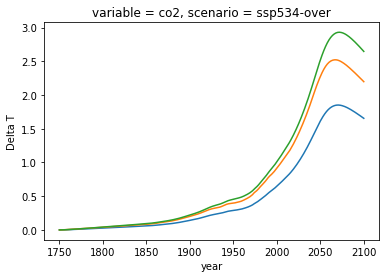

In [19]:
for per in IRFpercentiles:
    dic_ds[per].isel(scenario=0, variable=0)[name_deltaT].plot()

### Make datset with percentile as dimension:

In [20]:
ds_tmp = xr.Dataset(coords=dic_ds[median].coords)
ds_tmp
for key in IRFpercentiles:
    ds_tmp[key] = dic_ds[key]['Delta T']  # .dims,dic_ds[key],)
ds['Delta T'] = ds_tmp.to_array('percentile')
ds.sel(year=slice(first_y, last_y)).to_netcdf(PATH_DT_OUTPUT)
# ds_DT.to_array('percentile')
# dic_ds[key]['Delta T']

## Table

### Setup table:

In [21]:

iterables = [list(IRFpercentiles), years]


def setup_table(scenario_n='', variables=variables_all):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    table = pd.DataFrame(columns= variables, index=_i).transpose()
    table.index.name = scenario_n
    return table

In [22]:
# Dicitonary of tables with different ESC:
scntab_dic = {}
for scn in scenarios_fl:
    # Loop over scenrarios
    tab = setup_table(scenario_n=scn, variables=variables_erf_comp)  # make table
    for var in variables_erf_comp:
        # Loop over variables
        tabvar = var.split('|')[-1]
        dtvar = name_deltaT
        for key in IRFpercentiles:
            # Loop over ESC parameters
            for year in years:
                _tab_da = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year, year)) - dic_ds[key][dtvar].sel(
                    scenario=scn, year=slice(ref_year, ref_year)).squeeze()
                a = float(_tab_da.loc[var].squeeze().values)
                tab.loc[tabvar, (key, year)] = a
    scntab_dic[scn] = tab.copy()

In [23]:
from IPython.display import display

for key in scntab_dic:
    display(scntab_dic[key])

5th percentile                   median  \
                                         2040         2100        2040   
ssp534-over                                                              
ch4                                 0.0460105    -0.136561   0.0659782   
aerosol-radiation_interactions      0.0276469  0.000296696   0.0208388   
aerosol-cloud_interactions          0.0774809     0.342924    0.102487   
aerosol-total                        0.105128      0.34322    0.123326   
o3                                  0.0332252    -0.105721   0.0476674   
HFCs                                0.0310598    0.0137445   0.0457322   
bc_on_snow                        -0.00111697   -0.0363573 -0.00495818   
total_anthropogenic                  0.640179     0.751067    0.880103   
total                                0.612636     0.711726    0.849412   

                                          95th percentile              
                                     2100            2040        2100  
ssp534-over                                                            
ch4                             -0.198504       0.0712856   -0.208696  
aerosol-radiation_interactions -0.0189127       0.0496176  0.00692326  
aerosol-cloud_interactions       0.456242        0.122006    0.541836  
aerosol-total                    0.437329        0.171624     0.54876  
o3                              -0.151337       0.0519997   -0.162475  
HFCs                            0.0131958       0.0474941   0.0240984  
bc_on_snow                     -0.0530021     -0.00042762  -0.0558342  
total_anthropogenic              0.852175         1.00573      1.2625  
total                            0.806298        0.961896     1.19856

5th percentile                  median  \
                                         2040        2100        2040   
ssp119                                                                  
ch4                                -0.0211962   -0.132547  -0.0435992   
aerosol-radiation_interactions      0.0267974   0.0355028   0.0272899   
aerosol-cloud_interactions           0.211253    0.354827    0.296576   
aerosol-total                         0.23805     0.39033    0.323866   
o3                                 -0.0542923   -0.115088  -0.0852854   
HFCs                               0.00588454 -0.00253999  0.00411744   
bc_on_snow                         -0.0218438  -0.0349958  -0.0328418   
total_anthropogenic                  0.341676    0.125607     0.38844   
total                                0.314134   0.0862657    0.357749   

                                           95th percentile              
                                      2100            2040        2100  
ssp119                                                                  
ch4                              -0.190789      -0.0274689    -0.20331  
aerosol-radiation_interactions   0.0386569       0.0458733   0.0590168  
aerosol-cloud_interactions        0.467647        0.325684     0.56179  
aerosol-total                     0.506304        0.371557    0.620807  
o3                                -0.15895      -0.0795345   -0.178863  
HFCs                           -0.00685072       0.0106937 -0.00265155  
bc_on_snow                      -0.0476939      -0.0326904  -0.0548379  
total_anthropogenic              0.0397588        0.568091    0.256774  
total                          -0.00611878        0.524259    0.192828

5th percentile                 median  \
                                         2040       2100        2040   
ssp460                                                                 
ch4                                 0.0615979    0.13994     0.08678   
aerosol-radiation_interactions      0.0148777 -0.0134778  0.00585777   
aerosol-cloud_interactions        -0.00776261   0.199568 -0.00982064   
aerosol-total                       0.0071151    0.18609 -0.00396287   
o3                                  0.0436438  0.0772109   0.0609482   
HFCs                                0.0279963  0.0360286   0.0418612   
bc_on_snow                         0.00777742 -0.0213529  0.00711085   
total_anthropogenic                   0.50283    1.82406    0.680535   
total                                0.475287    1.78471    0.649844   

                                          95th percentile             
                                     2100            2040       2100  
ssp460                                                                
ch4                               0.18035        0.095536   0.226967  
aerosol-radiation_interactions -0.0336833       0.0290407 -0.0163153  
aerosol-cloud_interactions       0.285364      -0.0114197   0.305947  
aerosol-total                     0.25168       0.0176209   0.289632  
o3                              0.0958317       0.0683801   0.127461  
HFCs                            0.0423089       0.0426295  0.0599304  
bc_on_snow                     -0.0348134       0.0133814 -0.0312622  
total_anthropogenic               2.41429        0.796129    2.91398  
total                             2.36842        0.752297    2.85003

5th percentile                  median  \
                                         2040        2100        2040   
ssp585                                                                  
ch4                                  0.043176    0.118125   0.0617722   
aerosol-radiation_interactions      0.0276469 -0.00351149   0.0208388   
aerosol-cloud_interactions          0.0774809     0.22549    0.102487   
aerosol-total                        0.105128    0.221978    0.123326   
o3                                  0.0314311   0.0478844   0.0449848   
HFCs                                0.0310533    0.177898   0.0457237   
bc_on_snow                        -0.00111697  -0.0260299 -0.00495818   
total_anthropogenic                  0.630998     3.24971    0.866265   
total                                0.603455     3.21037    0.835574   

                                          95th percentile               
                                     2100            2040         2100  
ssp585                                                                  
ch4                              0.147688       0.0669973     0.194038  
aerosol-radiation_interactions  -0.023004       0.0496176  0.000293956  
aerosol-cloud_interactions       0.309466        0.122006     0.350508  
aerosol-total                    0.286462        0.171624     0.350802  
o3                              0.0490074       0.0492912    0.0842299  
HFCs                             0.243852        0.047484     0.280069  
bc_on_snow                     -0.0405021     -0.00042762   -0.0388526  
total_anthropogenic               4.43397        0.991899      5.12999  
total                             4.38809        0.948067      5.06604

5th percentile                   median  \
                                         2040         2100        2040   
ssp370                                                                   
ch4                                 0.0538996      0.21428   0.0763069   
aerosol-radiation_interactions      0.0137575   0.00501648  0.00794347   
aerosol-cloud_interactions         -0.0405811  -0.00435452  -0.0540105   
aerosol-total                      -0.0268236  0.000661959   -0.046067   
o3                                  0.0528453     0.186486    0.074026   
HFCs                                0.0201898     0.077305   0.0281403   
bc_on_snow                          0.0120706    0.0069392   0.0135538   
total_anthropogenic                  0.516666      2.49785    0.710428   
total                                0.489123      2.45851    0.679737   

                                           95th percentile              
                                      2100            2040        2100  
ssp370                                                                  
ch4                               0.290079       0.0836025    0.340764  
aerosol-radiation_interactions -0.00457062       0.0261718   0.0116201  
aerosol-cloud_interactions      0.00706164      -0.0625735   -0.014768  
aerosol-total                   0.00249102      -0.0364017 -0.00314799  
o3                                0.251216       0.0825078     0.29697  
HFCs                              0.104603       0.0314873    0.122356  
bc_on_snow                      0.00433498       0.0198662   0.0130911  
total_anthropogenic                3.41373        0.814198     3.94442  
total                              3.36785        0.770366     3.88047

5th percentile                 median  \
                                         2040       2100        2040   
ssp370-lowNTCF-aerchemmip                                              
ch4                                 0.0538996    0.21428   0.0763069   
aerosol-radiation_interactions       0.018163  0.0188811   0.0144385   
aerosol-cloud_interactions          0.0658254    0.26057    0.106453   
aerosol-total                       0.0839884   0.279451    0.120891   
o3                                   0.021296   0.124686   0.0273773   
HFCs                                0.0201898   0.077305   0.0281403   
bc_on_snow                        -0.00351554 -0.0253538 -0.00978583   
total_anthropogenic                  0.580373    2.67418    0.807445   
total                                0.552831    2.63484    0.776754   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-aerchemmip                                             
ch4                              0.290079       0.0836025   0.340764  
aerosol-radiation_interactions  0.0127297        0.032863  0.0341276  
aerosol-cloud_interactions       0.360178       0.0978279   0.406339  
aerosol-total                    0.372908        0.130691   0.440466  
o3                               0.169516       0.0346873    0.19852  
HFCs                             0.104603       0.0314873   0.122356  
bc_on_snow                     -0.0384597      -0.0036756  -0.038326  
total_anthropogenic               3.64746        0.909976    4.22529  
total                             3.60158        0.866144    4.16134

5th percentile                  median  \
                                         2040         2100       2040   
ssp126                                                                  
ch4                                -0.0130988    -0.125797 -0.0295289   
aerosol-radiation_interactions       0.022467     0.043453  0.0236952   
aerosol-cloud_interactions           0.175472     0.353985   0.248144   
aerosol-total                        0.197939     0.397438   0.271839   
o3                                 -0.0374045    -0.113415 -0.0591063   
HFCs                                 0.014202 -0.000564992  0.0172799   
bc_on_snow                         -0.0183393   -0.0331015 -0.0276422   
total_anthropogenic                  0.410642     0.471358   0.515045   
total                                0.383099     0.432017   0.484354   

                                           95th percentile               
                                      2100            2040         2100  
ssp126                                                                   
ch4                              -0.182062      -0.0158693    -0.192278  
aerosol-radiation_interactions   0.0491547        0.038495    0.0719056  
aerosol-cloud_interactions        0.469118        0.270259     0.559447  
aerosol-total                     0.518272        0.308754     0.631352  
o3                               -0.157794      -0.0543619    -0.175645  
HFCs                           -0.00439267       0.0229818  0.000570525  
bc_on_snow                      -0.0454972      -0.0273938   -0.0516619  
total_anthropogenic               0.512577        0.665165     0.803275  
total                               0.4667        0.621333     0.739329

5th percentile                  median  \
                                         2040        2100        2040   
ssp245                                                                  
ch4                                 0.0304051 -0.00375764   0.0385902   
aerosol-radiation_interactions     0.00596335  0.00807782 -0.00412367   
aerosol-cloud_interactions          0.0450224    0.268819   0.0625821   
aerosol-total                       0.0509857    0.276896   0.0584585   
o3                                   0.015815  -0.0334212   0.0192689   
HFCs                                0.0217888    0.046576   0.0299945   
bc_on_snow                        -0.00350188  -0.0312791 -0.00782164   
total_anthropogenic                  0.458335     1.42361    0.603916   
total                                0.430792     1.38427    0.573225   

                                           95th percentile               
                                      2100            2040         2100  
ssp245                                                                   
ch4                             -0.0151432        0.048878  6.04156e-05  
aerosol-radiation_interactions -0.00200094       0.0145896    0.0170052  
aerosol-cloud_interactions        0.364554       0.0704717     0.420758  
aerosol-total                     0.362553       0.0850613     0.437763  
o3                              -0.0529765       0.0263301   -0.0478289  
HFCs                             0.0605196       0.0340518    0.0747306  
bc_on_snow                      -0.0455274     -0.00426394   -0.0479007  
total_anthropogenic                1.84592        0.732126      2.29091  
total                              1.80005        0.688294      2.22697

5th percentile                  median  \
                                         2040        2100        2040   
ssp434                                                                  
ch4                                  0.039938   0.0966681   0.0515637   
aerosol-radiation_interactions      0.0254247  0.00483434   0.0224036   
aerosol-cloud_interactions          0.0448268    0.250228   0.0728556   
aerosol-total                       0.0702516    0.255062   0.0952592   
o3                                  0.0226827   0.0403019   0.0271271   
HFCs                                0.0042419 -0.00507438   0.0025952   
bc_on_snow                           0.002168  -0.0251879 -0.00164383   
total_anthropogenic                  0.426716    0.907603    0.548966   
total                                0.399173    0.868262    0.518274   

                                          95th percentile              
                                     2100            2040        2100  
ssp434                                                                 
ch4                              0.121467       0.0637394    0.158487  
aerosol-radiation_interactions -0.0087543       0.0447315   0.0126985  
aerosol-cloud_interactions        0.35309       0.0667679    0.386894  
aerosol-total                    0.344336        0.111499    0.399592  
o3                              0.0448208       0.0375125    0.069379  
HFCs                           -0.0100131      0.00791996 -0.00671773  
bc_on_snow                     -0.0400315      0.00502329  -0.0373492  
total_anthropogenic               1.11739        0.686578     1.48714  
total                             1.07151        0.642746     1.42319

5th percentile                 median  \
                                         2040       2100        2040   
ssp370-lowNTCF-gidden                                                  
ch4                                -0.0225552   -0.10348  -0.0498562   
aerosol-radiation_interactions       0.018163  0.0188811   0.0144385   
aerosol-cloud_interactions          0.0658254    0.26057    0.106453   
aerosol-total                       0.0839884   0.279451    0.120891   
o3                                 -0.0255904  -0.078523  -0.0496821   
HFCs                                0.0202226  0.0670401    0.028119   
bc_on_snow                        -0.00351554 -0.0253538 -0.00978583   
total_anthropogenic                  0.450797     2.0982    0.593414   
total                                0.423254    2.05886    0.562723   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-gidden                                                 
ch4                             -0.147388       -0.028225  -0.159286  
aerosol-radiation_interactions  0.0127297        0.032863  0.0341276  
aerosol-cloud_interactions       0.360178       0.0978279   0.406339  
aerosol-total                    0.372908        0.130691   0.440466  
o3                              -0.111748      -0.0339758  -0.120594  
HFCs                            0.0898182       0.0315556   0.106491  
bc_on_snow                     -0.0384597      -0.0036756  -0.038326  
total_anthropogenic               2.85224        0.720505    3.31985  
total                             2.80636        0.676673     3.2559

### Make table with all scenarios:

In [24]:
iterables = [list(IRFpercentiles), years]
iterables2 = [scenarios_fl, variables_erf_comp]


def setup_table2():  # scenario_n=''):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    _r = pd.MultiIndex.from_product(iterables2, names=['', ''])

    table = pd.DataFrame(columns=_r, index=_i).transpose()
    return table

In [25]:
tab = setup_table2()  # scenario_n=scn)

for scn in scenarios_fl:
    for var in variables_erf_comp:
        tabvar = var#.split('|')[-1]
        dtvar = name_deltaT
        for key in IRFpercentiles:
            for year in years:
                # compute difference between year and ref year
                _da_y = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year, year), variable=var)  # .squeeze()
                _da_refy = dic_ds[key][dtvar].sel(scenario=scn, year=slice(ref_year, ref_year), variable=var).squeeze()
                # _tab_da = dic_ds[key][dtvar].sel(scenario=scn, time=slice(year,year))-  dic_ds[key][dtvar].sel(scenario=scn, time=slice(ref_year,ref_year)).squeeze()
                _tab_da = _da_y - _da_refy

                tab.loc[(scn, tabvar), (key, year)] = _tab_da.squeeze().values  # [0]

In [26]:
tab

5th percentile  \
                                                                       2040   
                                                                              
ssp534-over           ch4                               0.04601052074809908   
                      aerosol-radiation_interactions   0.027646911124779336   
                      aerosol-cloud_interactions         0.0774808933461602   
                      aerosol-total                      0.1051278044709395   
                      o3                                0.03322521854607588   
...                                                                     ...   
ssp370-lowNTCF-gidden o3                              -0.025590387061031505   
                      HFCs                             0.020222637466970284   
                      bc_on_snow                      -0.003515537415740226   
                      total_anthropogenic                 0.450796768800549   
                      total                             0.42325406256975673   

                                                                              \
                                                                        2100   
                                                                               
ssp534-over           ch4                               -0.13656096540757673   
                      aerosol-radiation_interactions  0.00029669569883550295   
                      aerosol-cloud_interactions          0.3429235637366772   
                      aerosol-total                      0.34322025943551265   
                      o3                                -0.10572064838351944   
...                                                                      ...   
ssp370-lowNTCF-gidden o3                                -0.07852297367083774   
                      HFCs                               0.06704005204554944   
                      bc_on_snow                       -0.025353785549997898   
                      total_anthropogenic                  2.098197144770179   
                      total                               2.0588562159006587   

                                                                     median  \
                                                                       2040   
                                                                              
ssp534-over           ch4                               0.06597821862701214   
                      aerosol-radiation_interactions    0.02083883997813782   
                      aerosol-cloud_interactions        0.10248677166582282   
                      aerosol-total                     0.12332561164396061   
                      o3                                0.04766738328025577   
...                                                                     ...   
ssp370-lowNTCF-gidden o3                                -0.0496820703140336   
                      HFCs                             0.028119028453603558   
                      bc_on_snow                      -0.009785834998705986   
                      total_anthropogenic                0.5934144126545804   
                      total                              0.5627233247555752   

                                                                            \
                                                                      2100   
                                                                             
ssp534-over           ch4                             -0.19850444606467135   
                      aerosol-radiation_interactions  -0.01891274875333311   
                      aerosol-cloud_interactions        0.4562421273147397   
                      aerosol-total                     0.4373293785614066   
                      o3                              -0.15133653220463722   
...                                                                    ...   
ssp370-lowNTCF-gidden o3

## Save output

In [27]:
tab.to_csv(PATH_DT_TAB_OUTPUT)

In [28]:
PATH_DT_TAB_OUTPUT

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables/table_sens_dT_cs.csv')

## Double check historical $\Delta$ T: 


In [29]:
from matplotlib.ticker import (MultipleLocator)

from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

In [30]:
ls_vars = ['aerosol-total', 'ch4', 'co2', 'other_wmghg', 'o3','HFCs']

In [31]:
cdic = get_cmap_dic(ls_vars)

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/pandas/core/indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [32]:
ds

<xarray.Dataset>
Dimensions:     (percentile: 3, scenario: 10, variable: 19, year: 451)
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2197 2198 2199 2200
  * variable    (variable) object 'co2' 'ch4' ... 'aerosol-total-with_bc' 'HFCs'
  * scenario    (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
  * percentile  (percentile) <U15 '5th percentile' 'median' '95th percentile'
Data variables:
    ERF         (scenario, variable, year) float64 ...
    time        (year) datetime64[ns] 1750-01-01 1751-01-01 ... 2200-01-01
    delta_t     (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    Delta T     (percentile, scenario, variable, year) float64 0.0 ... nan

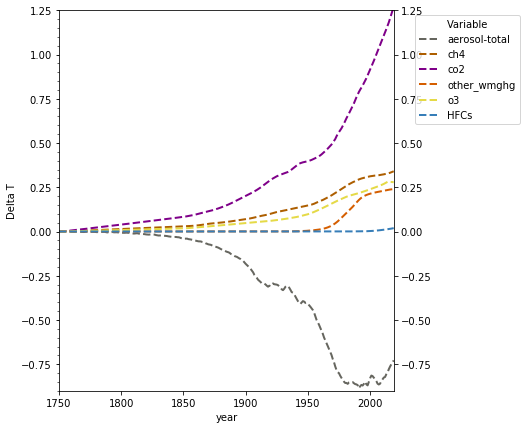

In [33]:

fig, ax = plt.subplots(figsize=[6, 7])

ds_hist = ds.sel(year=slice(1750, 2019), percentile='median', scenario='ssp119', variable=ls_vars)
for var in ds_hist.variable.values:
    ds_hist.sel(variable=var)[name_deltaT].plot(label=var, linestyle='dashed', linewidth=2, c=cdic[var])
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')  # , prop=fontP)
ax.yaxis.set_major_locator(MultipleLocator(.25))
ax.yaxis.set_minor_locator(MultipleLocator(.05))
ax.tick_params(right=True, labelright=True)
ax.set_xlim([1750, 2019])
ax.set_ylim([-0.9, 1.25])
plt.title('')
plt.savefig('test.pdf')
plt.show()

In [34]:
da_ERF.scenario

<xarray.DataArray 'scenario' (scenario: 10)>
array(['ssp534-over', 'ssp370-lowNTCF-gidden', 'ssp119', 'ssp370', 'ssp434',
       'ssp460', 'ssp585', 'ssp126', 'ssp245', 'ssp370-lowNTCF-aerchemmip'],
      dtype=object)
Coordinates:
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'

In [35]:
OLD:

SyntaxError: invalid syntax (<ipython-input-35-d9711b258dcc>, line 1)